Import des librairies nécessaires aux analyses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns

Lecture du DF et cleaning rapide de notre colonne cible

In [2]:
df = pd.read_csv(r"C:\Users\Dylan\Desktop\Portfolio\MPG\MPG.csv")
df.head()


df = df[df['Note'] != 0]
df = df[df['Nb match'] > 14]


df.reset_index(drop=True, inplace=True)

Analyse KDE

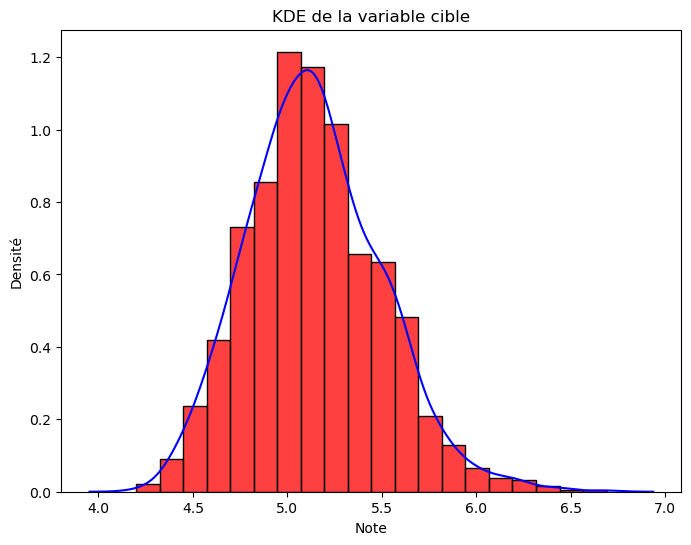

In [3]:
#Création de la taille de la figure
plt.figure(figsize=(8, 6))

#Tracé de l'histogramme
sns.histplot(data=df, x='Note', bins=20, kde=False, color='red', stat='density')

#Ajout de la courbe de densité par-dessus l'histogramme
sns.kdeplot(data=df['Note'], color='blue', fill=False)

#Légendes de l'histogramme
plt.title('KDE de la variable cible')
plt.xlabel('Note')
plt.ylabel('Densité')

#Affichage
plt.show()

Q-Q Plot

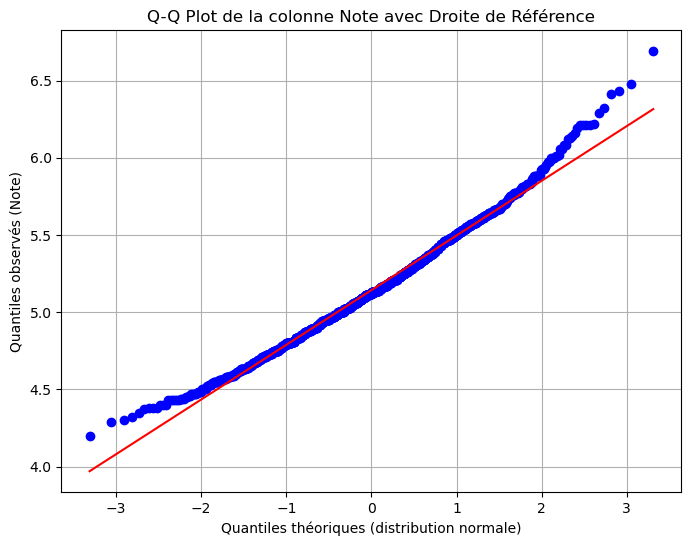

In [4]:
notes=df['Note']

plt.figure(figsize=(8, 6))
stats.probplot(notes, dist="norm", plot=plt)
plt.xlabel('Quantiles théoriques (distribution normale)')
plt.ylabel('Quantiles observés (Note)')
plt.title('Q-Q Plot de la colonne Note avec Droite de Référence')
plt.grid(True)
plt.show()

P-Value

In [5]:
shapiro_test_statistic, p_value = stats.shapiro(notes)

print(f"Statistique de test de Shapiro-Wilk : {shapiro_test_statistic}")
print(f"P-value : {p_value}")

#Interprétation de la p-value
alpha = 0.05  #Niveau de signification
if p_value < alpha:
    print("La p-value est inférieure au niveau de signification alpha. On rejette l'hypothèse nulle (les données ne suivent pas une distribution normale).")
else:
    print("La p-value est supérieure au niveau de signification alpha. On ne peut pas rejeter l'hypothèse nulle (les données suivent une distribution normale).")

Statistique de test de Shapiro-Wilk : 0.989643931388855
P-value : 8.38334379693606e-09
La p-value est inférieure au niveau de signification alpha. On rejette l'hypothèse nulle (les données ne suivent pas une distribution normale).


Cleaning du jeu de données pour réaliser nos analyses générales

In [9]:
df['Valeur_Joueur'] = df[['Cote', 'Enchère moy']].max(axis=1)

df['Min/But'] = df['Min/But'].fillna(0)
df['Pass decis.'] = df['Pass decis.'].fillna(0)
df['Occas° créée'] = df['Occas° créée'].fillna(0)
df['Corner gagné'] = df['Corner gagné'].fillna(0)
df['Cleansheet'] = df['Cleansheet'].fillna(0)
df['Interceptions'] = df['Interceptions'].fillna(0)
df['Tacles'] = df['Tacles'].fillna(0)
df['%Duel'] = df['%Duel'].fillna(0)
df['Fautes'] = df['Fautes'].fillna(0)
df['But évité'] = df['But évité'].fillna(0)
df['Action stoppée'] = df['Action stoppée'].fillna(0)
df['%Passes'] = df['%Passes'].fillna(0)
df['Ballons'] = df['Ballons'].fillna(0)

df = df.drop(['Cote', 'Enchère moy'], axis=1)

#Suppression des colonnes qui ne nous servent pas
colonnes_supprimees = ['But/Peno', 'But/Coup-franc', 'But/surface', 'Prochain opposant', 'Date', 'Victoire probable', '%Win+12J', '%Win+16J', '%Win+20J', 'DMI']
df=df.drop(columns=colonnes_supprimees)

#Suppression des colonnes avec Série ou 1 an dans leur nom
colonnes_serie1an= df.filter(regex='série|1 an', axis=1)
df=df.drop(columns=colonnes_serie1an)
df=df.drop(['Joueur'], axis=1)
df=df.drop(['Club'], axis=1)
df=df.drop(['Min/But', 'Min note/but', 'Prix/but'], axis=1)

#On récupère la valeur max/min/médiane de chaque joueur
valeur_max = df[['j1', 'j2', 'j3', 'j4', 'j5', 'j6', 'j7', 'j8', 'j9', 'j10', 'j11', 'j12', 'j13', 'j14', 'j15', 'j16', 'j17', 'j18', 'j19', 'j20', 'j21', 'j22', 'j23', 'j24', 'j25', 'j26', 'j27', 'j28', 'j29', 'j30', 'j31', 'j32', 'j33', 'j34', 'j35', 'j36', 'j37', 'j38']].max(axis=1)
valeur_min = df[['j1', 'j2', 'j3', 'j4', 'j5', 'j6', 'j7', 'j8', 'j9', 'j10', 'j11', 'j12', 'j13', 'j14', 'j15', 'j16', 'j17', 'j18', 'j19', 'j20', 'j21', 'j22', 'j23', 'j24', 'j25', 'j26', 'j27', 'j28', 'j29', 'j30', 'j31', 'j32', 'j33', 'j34', 'j35', 'j36', 'j37', 'j38']].replace(0, float('inf')).min(axis=1)
valeur_mediane = df[['j1', 'j2', 'j3', 'j4', 'j5', 'j6', 'j7', 'j8', 'j9', 'j10', 'j11', 'j12', 'j13', 'j14', 'j15', 'j16', 'j17', 'j18', 'j19', 'j20', 'j21', 'j22', 'j23', 'j24', 'j25', 'j26', 'j27', 'j28', 'j29', 'j30', 'j31', 'j32', 'j33', 'j34', 'j35', 'j36', 'j37', 'j38']].median(axis=1)

#On crée une colonne qui rajoute nos valeurs
df['Note_Max'] = valeur_max
df['Note_Min_Sans_Zero'] = valeur_min
df['Note_Mediane'] = valeur_mediane

colonnes_a_supprimer = ['j1', 'j2', 'j3', 'j4', 'j5', 'j6', 'j7', 'j8', 'j9', 'j10', 'j11', 'j12', 'j13', 'j14', 'j15', 'j16', 'j17', 'j18', 'j19', 'j20', 'j21', 'j22', 'j23', 'j24', 'j25', 'j26', 'j27', 'j28', 'j29', 'j30', 'j31', 'j32', 'j33', 'j34', 'j35', 'j36', 'j37', 'j38']
df.drop(columns=colonnes_a_supprimer, axis=1, inplace=True)

Analyse entre nombre de passes décisives et valeur du joueur

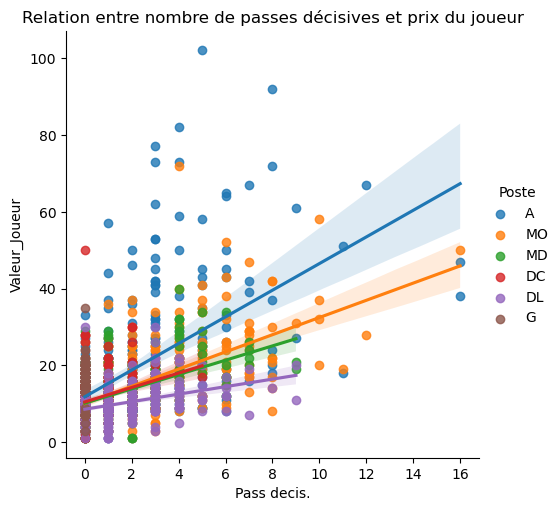

In [11]:
sns.lmplot(data=df, x='Pass decis.', y='Valeur_Joueur', hue='Poste');
plt.title('Relation entre nombre de passes décisives et prix du joueur');

Analyse entre nombre de buts et valeur du joueur

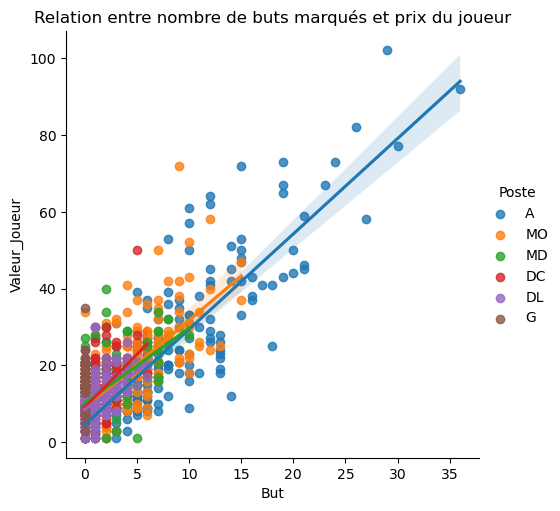

In [12]:
sns.lmplot(data=df, x='But', y='Valeur_Joueur', hue='Poste')
plt.title('Relation entre nombre de buts marqués et prix du joueur');

Distribution de la valeur du joueur en fonction de son poste

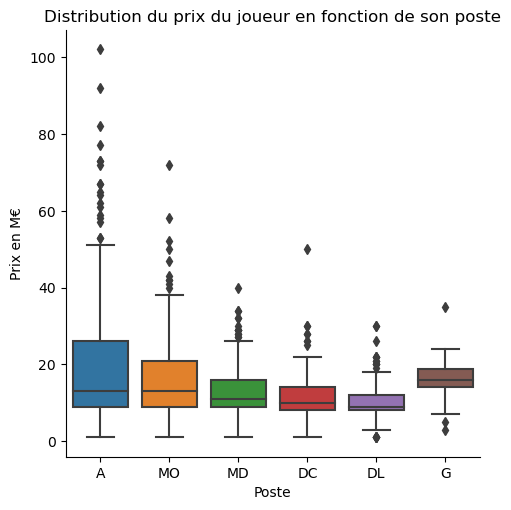

In [14]:
sns.catplot(x='Poste', y='Valeur_Joueur', data = df, kind='box')
plt.title('Distribution du prix du joueur en fonction de son poste')
plt.ylabel('Prix en M€')
plt.show()

Lien entre le nombre de buts marqués, la note et le poste

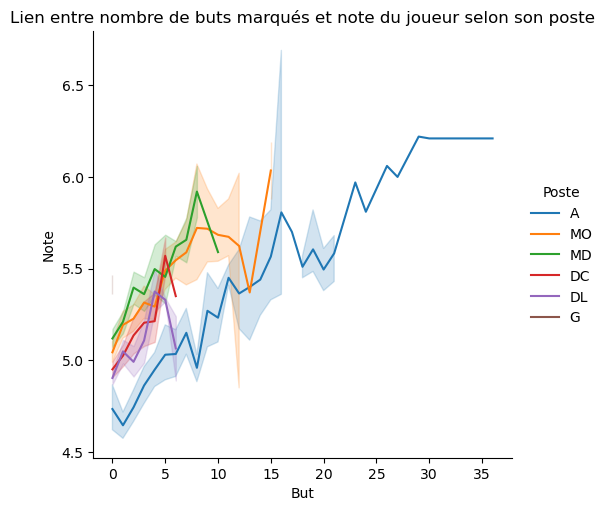

In [15]:
sns.relplot(x='But', y='Note', hue='Poste', kind='line', data=df);
plt.title('Lien entre nombre de buts marqués et note du joueur selon son poste')
plt.show()

Répartition des notes des joueurs

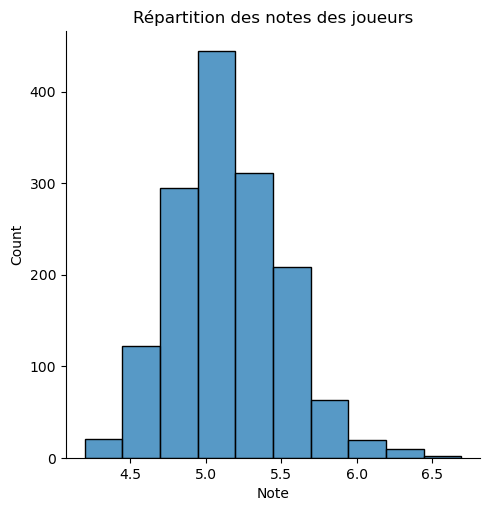

In [16]:
sns.displot(x='Note', bins=10, data=df)
plt.title('Répartition des notes des joueurs');

Boxplot de la variable Note

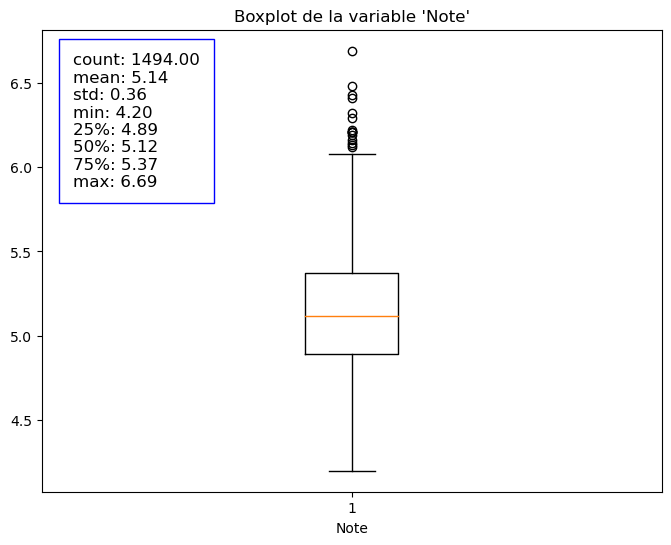

In [17]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['Note'])
plt.title("Boxplot de la variable 'Note'")
plt.xlabel("Note")

stats = df['Note'].describe()
textstr = '\n'.join([f"{stat}: {value:.2f}" for stat, value in stats.items()])
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox={'facecolor': 'white', 'edgecolor': 'blue', 'pad': 10})
plt.show()